In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath,header=None)

In [3]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [4]:
headers = ["Age", "Gender", "BMI", "No_of_children", "Smoker", "Region", "Charges"]
df.columns = headers

In [5]:
df.replace('?',np.nan,inplace = True)

In [6]:
df

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2768 non-null   object 
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [8]:
mean_age = df["Age"].astype('float').mean()
df['Age'].replace(np.nan,mean_age,inplace=True)

In [9]:
smoker_freq = df["Smoker"].value_counts().idxmax()
df["Smoker"].replace(np.nan,smoker_freq,inplace=True)

In [10]:
df[['Age','Smoker']]=df[['Age','Smoker']].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   float64
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2772 non-null   float64
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB


In [12]:
df["Charges"] = np.round(df["Charges"],2)
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,19.0,1,27.900,0,1.0,3,16884.92
1,18.0,2,33.770,1,0.0,4,1725.55
2,28.0,2,33.000,3,0.0,4,4449.46
3,33.0,2,22.705,0,0.0,1,21984.47
4,32.0,2,28.880,0,0.0,1,3866.86


(0.0, 66902.85800000001)

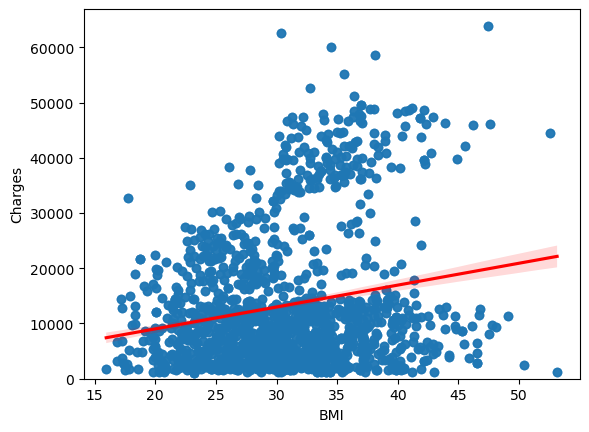

In [13]:
sns.regplot(x='BMI',y='Charges',data=df,line_kws={'color':'Red'})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

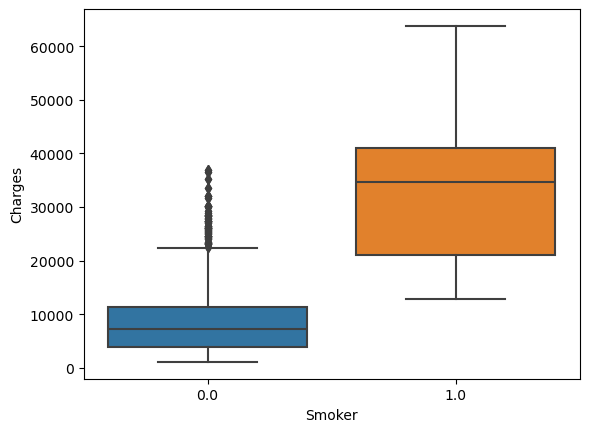

In [14]:
sns.boxplot(x='Smoker',y='Charges',data=df)

In [15]:
df.corr()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
Age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
Gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [16]:
Input = [('Scale',StandardScaler()),('Polynomial',PolynomialFeatures(include_bias=False)),('Model',LinearRegression())]
pipe = Pipeline(Input)


In [17]:
X = df[["Age", "Gender", "BMI", "No_of_children", "Smoker", "Region"]]
Y = df[["Charges"]]

In [18]:
X_train, X_test,y_train,y_test= train_test_split(X,Y,train_size=0.3)

In [19]:
pipe.fit(X_train,y_train)
yhat = pipe.predict(X_test)

In [21]:
yhat

array([[ 5932.3125  ],
       [ 9235.109375],
       [ 8719.6875  ],
       ...,
       [ 2130.53125 ],
       [ 5453.3125  ],
       [10449.09375 ]])

In [20]:
print("R Squared: ",r2_score(yhat,y_test) )

R Squared:  0.8261737350906909
